# Programming Exercise 1: Linear Regression

### Linear regression with one variable

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

In [2]:
data=pd.read_csv('ex1data1.txt',names=['population','profit'])
data_x=np.c_[np.ones(data.shape[0]),data.population]
data_y=np.c_[data.profit]
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### Plotting the Data

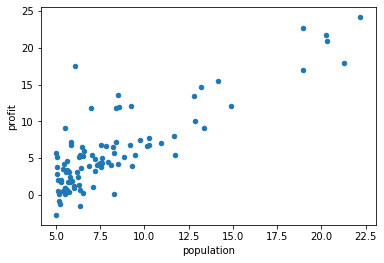

In [3]:
data.plot(x='population',y='profit',kind='scatter')

### Gradient Descent

In [4]:
def error(x,y,theta):
    return np.sum(np.square(x.dot(theta.T) - y)) / (2 * len(x))

In [5]:
def gradient_descent(x, y, theta, alpha, iterations):
    error_history = np.zeros(iterations)
    for i in range(iterations):
        theta -= (alpha / len(x)) * (x.T.dot(x.dot(theta.T) - y)).T
        error_history[i] = error(x, y, theta)
    
    return (theta.ravel(), error_history)


(0, 1500)

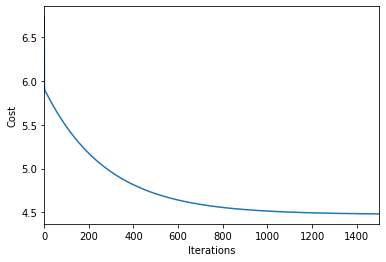

In [6]:
theta = np.zeros((1, 2))

iterations = 1500
alpha = 0.01 # Learning rate

theta, error_history = gradient_descent(data_x, data_y, theta, alpha, iterations)
plt.plot(error_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.xlim(0, iterations)

### Linear Regression

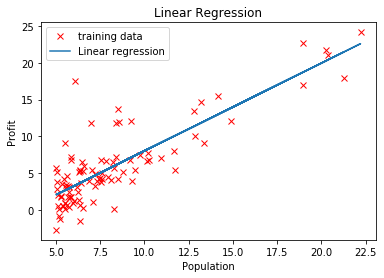

In [7]:
x=data_x[:,1].reshape(-1,1)
y=data_y
model=LinearRegression()
model.fit(x,y)
plt.plot(data_x[:,1],y,'rx',label='training data')
plt.plot(data_x[:,1],(model.intercept_ + model.coef_ * data_x[:, 1]).T, label='Linear regression')

plt.title('Linear Regression')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.legend(loc='best')

In [8]:
predict1 = np.array([1, 3.5]).dot(theta)
print ("For population = 35,000, we predict a profit of", predict1 * 10000)

predict2 = np.array([1, 7]).dot(theta)
print ("For population = 70,000, we predict a profit of", predict2 * 10000)

For population = 35,000, we predict a profit of 4519.7678677017675
For population = 70,000, we predict a profit of 45342.45012944714


### Multivariate linear regression


In [9]:
data=pd.read_csv('ex1data2.txt',names=['size','bedrooms','price'])
data.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [41]:
data_x=np.c_[data.loc[:,'size':'bedrooms']].astype('float')
data_y=np.c_[data['price']].astype('float')

### Feature Normalization

/home/mina/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


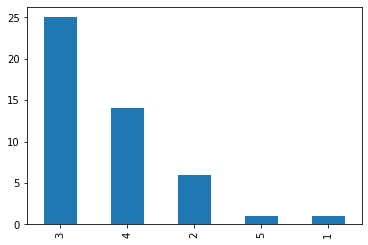

In [31]:
data['bedrooms'].value_counts().plot('bar')

/home/mina/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


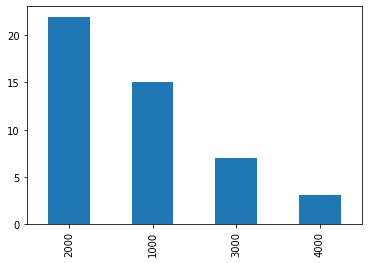

In [32]:
data['size'].round(-3).value_counts().plot('bar')

In [47]:
normalized_x=np.divide(data_x-data_x.mean(axis=0),data_x.std(axis=0,ddof=1))
x=np.c_[np.ones(data.shape[0]),normalized_x]

### Gradient Descent

(0, 400)

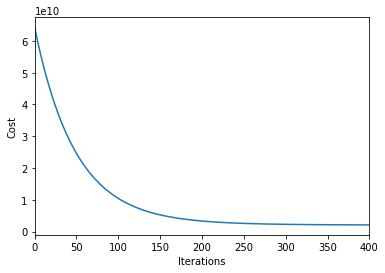

In [50]:
alpha = 0.01 
iterations = 400

theta = np.zeros((1, 3))
theta, error_history = gradient_descent(x, data_y, theta, alpha, iterations)

plt.plot(error_history)

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.xlim(0, iterations)

### Normal Equations

In [58]:
theta_normal = np.linalg.inv(x.T.dot(x)).dot(x.T.dot(data_y)).ravel()
print('theta from gradient descent:\n{}  and theta from normal equation\n{}'.format(theta,theta_normal))


theta from gradient descent:
[334302.06399328 100087.11600585   3673.54845093]  and theta from normal equation
[340412.65957447 110631.05027885  -6649.47427082]
